<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-03-04 21:39:56--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.5’

m4_survey_data.sqli 100%[===================>]  34.98M  36.0MB/s    in 1.0s    

2024-03-04 21:39:58 (36.0 MB/s) - ‘m4_survey_data.sqlite.5’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection
%reload_ext sql
%sql sqlite:///m4_survey_data.sqlite

'Connected: @m4_survey_data.sqlite'

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [7]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
WHERE Age != 'NaN'
group by age
order by age

"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,16.0,3
1,17.0,6
2,18.0,29
3,19.0,78
4,20.0,109
5,21.0,203
6,22.0,406
7,23.0,581
8,24.0,679
9,25.0,738


## Demo: How to describe a table


In [8]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


 * sqlite:///m4_survey_data.sqlite
Done.


(array([-250000.,       0.,  250000.,  500000.,  750000., 1000000.,
        1250000., 1500000., 1750000., 2000000., 2250000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

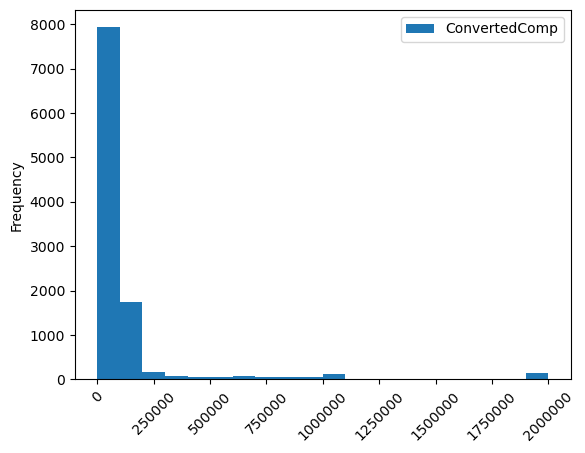

In [6]:
# your code goes here
#!pip install matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
'exec(%matplot inline)'
import seaborn as sns
import pandas as pd
df = %sql SELECT ConvertedComp FROM master
df= df.DataFrame()
df.head()
df.plot(kind='hist', bins=20)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

### Box Plots


Plot a box plot of `Age.`


 * sqlite:///m4_survey_data.sqlite
Done.


<AxesSubplot:>

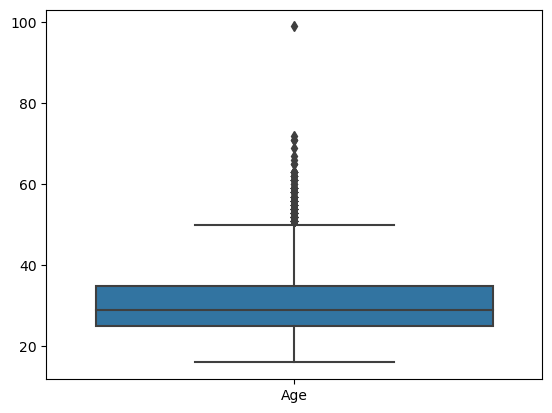

In [7]:
# your code goes here
df1 =%sql SELECT Age FROM master 
df1 = df1.DataFrame()
sns.boxplot(data=df1)

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


 * sqlite:///m4_survey_data.sqlite
Done.


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

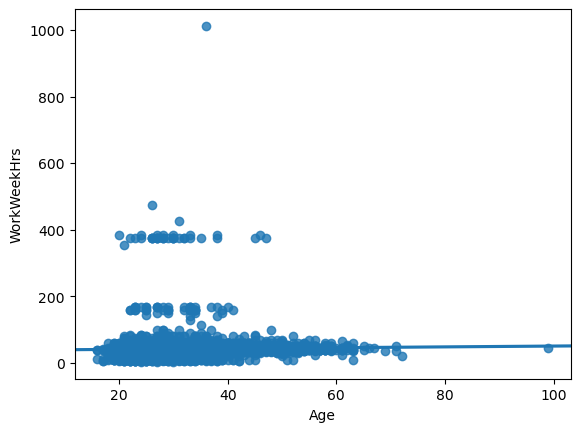

In [8]:
# your code goes here

df3= %sql SELECT Age, WorkWeekHrs FROM master

df3= df3.DataFrame()
sns.regplot(data=df3, x='Age', y='WorkWeekHrs')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


 * sqlite:///m4_survey_data.sqlite
Done.


Text(0, 0.5, 'Code Revision Hours')

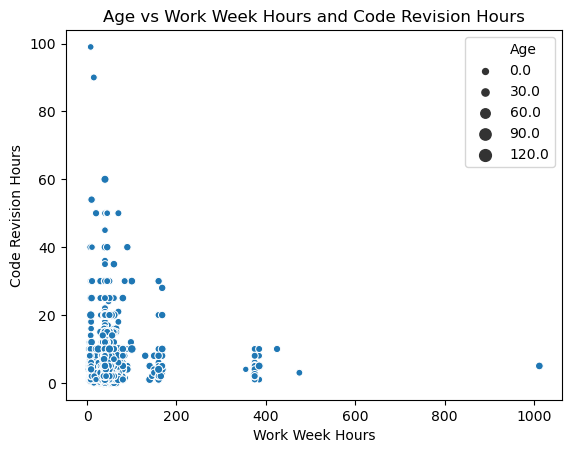

In [9]:
# your code goes here
import numpy as np
df4 = %sql SELECT WorkWeekHrs, CodeRevHrs, Age FROM master WHERE CodeRevHrs != 'None'
df4 = df4.DataFrame()

sns.scatterplot(data= df4, x= 'WorkWeekHrs', y='CodeRevHrs', size='Age')
plt.title('Age vs Work Week Hours and Code Revision Hours')
plt.xlabel('Work Week Hours')
plt.ylabel('Code Revision Hours')

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


 * sqlite:///m4_survey_data.sqlite
Done.


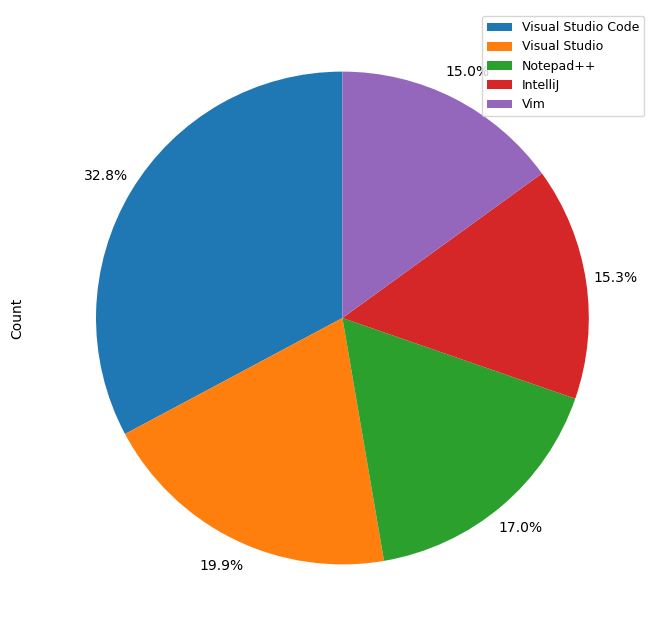

In [18]:
# your code goes here

#df5 = %sql SELECT  DatabaseDesireNextYear, COUNT(*) as Count FROM DatabaseDesireNextYear GROUP BY DatabaseDesireNextYear ORDER BY COUNT DESC LIMIT 5
#df5 = df5.DataFrame()
#df5.head()
#df5.plot(kind='pie', x= 'DatabaseDesireNextYear', y= 'Count', figsize=(14, 8), autopct='%1.1f%%', startangle=90, shadow=False, labels=None, pctdistance=1.12)
#plt.legend(labels=df5['DatabaseDesireNextYear'], loc='upper right', fontsize=9) 

#%sql SELECT DatabaseWorkedWith, COUNT(*) as COUNT FROM DatabaseWorkedWith GROUP BY DatabaseWorkedwith ORDER BY COUNT DESC 


df5 = %sql SELECT  DevEnviron, COUNT(*) as Count FROM DevEnviron GROUP BY DevEnviron ORDER BY COUNT DESC LIMIT 5
df5 = df5.DataFrame()
df5.head()
df5.plot(kind='pie', x= 'DevEnviron', y= 'Count', figsize=(14, 8), autopct='%1.1f%%', startangle=90, shadow=False, labels=None, pctdistance=1.12)
plt.legend(labels=df5['DevEnviron'], loc='upper right', fontsize=9) 




### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


 * sqlite:///m4_survey_data.sqlite
Done.


<AxesSubplot:>

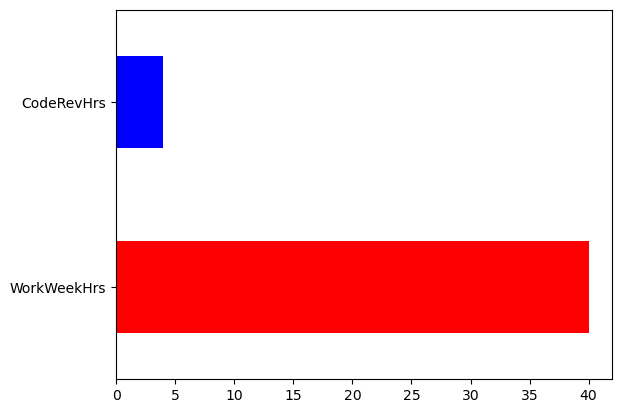

In [161]:
# your code goes here
df6 = %sql SELECT WorkWeekHrs, CodeRevHrs FROM master WHERE Age BETWEEN 30 AND 35 AND CodeRevHrs != 'None'
df6 = df6.DataFrame().T
df6 = df6.T
df7 = df6.median()
df7.plot.barh(x='WorkWeekHrs', y='CodeRevHrs', stacked=True, color= ['Red','Blue'])

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


 * sqlite:///m4_survey_data.sqlite
Done.


<AxesSubplot:xlabel='Age', ylabel='ConvertedComp'>

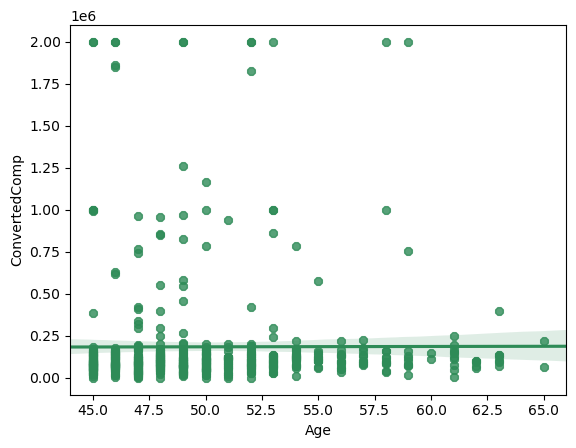

In [51]:
# your code goes here
df8 = %sql SELECT Age, ConvertedComp FROM master WHERE Age BETWEEN 45 and 65 AND ConvertedComp != 'None'
df8 = df8.DataFrame()
df8.head()
sns.regplot(data= df8, x='Age', y='ConvertedComp', marker='8', color='SeaGreen')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


 * sqlite:///m4_survey_data.sqlite
Done.
['I am a developer by profession'
 'I am not primarily a developer, but I write code sometimes as part of my work']


<AxesSubplot:>

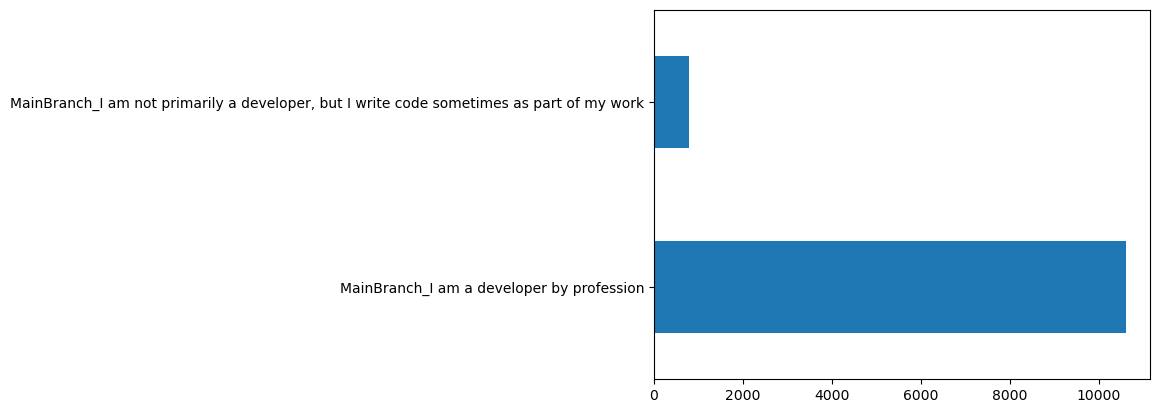

In [12]:
# your code goes here
df9 = %sql SELECT MainBranch FROM master
df9 =df9.DataFrame()
df9.value_counts()
print(df9['MainBranch'].unique())

encoded_df = pd.get_dummies(df9, columns = ['MainBranch'])
df10= encoded_df.sum()
df10.head()
df10.plot.barh()

Close the database connection.


In [13]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
